In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

# EDA

## View the dataset

In [2]:
df = pd.read_csv("Health Service Apps Survey (Responses) - Form responses 1.csv")
data = df.copy() # let us make another copy of data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 211 rows and 11 columns.


In [3]:
data.head(10) # Exploring initial 10 rows of the data set

,Timestamp,1) What is your age range?,2) Do you visit institutions under NUHS? (Please refer to the list above),3) Do you use any health services app?,"4a) If yes, which health service app(s) do you use? You may choose more than one.",4b) How did you come to know about the health service app(s) you are using? You may choose more than one.,4c) What do you use the health service app(s) for? You may choose more than one.,4d) Are you satisfied with the health service app(s) you are using?,4e) What additional features would you like to see in a health service app?,"5a) If no, what are the reasons you do not use any health services app? You may choose more than one.",5b) What may motivate you to use a health service app? Please select your top two answers.
0,25/5/2021 20:24,30 - 39,No,Yes,HealthHub,via hospital,"Manage appointments (E.g. Booking, cancelling,...",Yes,notification on appointments and health screen...,NaN,NaN
1,25/5/2021 20:25,30 - 39,Yes,Yes,"HealthHub, Health Buddy","Social media (E.g. Facebook, Instagram)","Manage appointments (E.g. Booking, cancelling,...",Yes,Crowd gauge and estimated waiting time,NaN,NaN
2,25/5/2021 20:28,30 - 39,No,No,NaN,NaN,NaN,NaN,NaN,"Not aware such health service apps exist, Trou...",Convenience (Access health information & servi...
3,25/5/2021 20:29,30 - 39,No,Yes,"HealthHub, Health Buddy",Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
4,25/5/2021 20:30,30 - 39,Yes,Yes,HealthHub,Saw an ad on TV screen while waiting to see do...,Manage personal health data (E.g. Check past r...,Yes,Nil,NaN,NaN
5,25/5/2021 20:31,30 - 39,Yes,Yes,Can't remember which one I use on my old phone,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
6,25/5/2021 20:31,30 - 39,No,Yes,HealthHub,"Recommendation from friend/family, Social medi...",Get the latest health tips,Yes,Maybe See a doctor online?,NaN,NaN
7,25/5/2021 20:31,30 - 39,Yes,Yes,HealthHub,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,None,NaN,NaN
8,25/5/2021 20:38,30 - 39,No,Yes,"HealthHub, Health Buddy","Social media (E.g. Facebook, Instagram), Saw a...","Manage appointments (E.g. Booking, cancelling,...",Yes,Q number.,NaN,NaN
9,25/5/2021 20:39,30 - 39,Yes,No,NaN,NaN,NaN,NaN,NaN,Not clear about the features of health service...,Convenience (Access health information & servi...


In [4]:
np.random.seed(42)  # To get the same random results every time
data.sample(n=10)

,Timestamp,1) What is your age range?,2) Do you visit institutions under NUHS? (Please refer to the list above),3) Do you use any health services app?,"4a) If yes, which health service app(s) do you use? You may choose more than one.",4b) How did you come to know about the health service app(s) you are using? You may choose more than one.,4c) What do you use the health service app(s) for? You may choose more than one.,4d) Are you satisfied with the health service app(s) you are using?,4e) What additional features would you like to see in a health service app?,"5a) If no, what are the reasons you do not use any health services app? You may choose more than one.",5b) What may motivate you to use a health service app? Please select your top two answers.
30,25/5/2021 21:15,40 - 49,Yes,Yes,HealthHub,"Recommendation from friend/family, Google search","Manage appointments (E.g. Booking, cancelling,...",Yes,Nil,NaN,NaN
173,26/5/2021 18:03,30 - 39,Yes,Yes,HealthHub,When I had to change and book appointments thr...,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
140,26/5/2021 14:17,30 - 39,Yes,No,NaN,NaN,NaN,NaN,NaN,Troublesome to download any health services app,Convenience (Access health information & servi...
75,25/5/2021 22:45,50 and above,Yes,Yes,HealthHub,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
60,25/5/2021 22:19,30 - 39,No,No,NaN,NaN,NaN,NaN,NaN,Troublesome to download any health services ap...,Convenience (Access health information & servi...
208,27/5/2021 21:40,40 - 49,No,No,NaN,NaN,NaN,NaN,NaN,"Not aware such health service apps exist, Not ...",Convenience (Access health information & servi...
45,25/5/2021 21:36,30 - 39,No,No,NaN,NaN,NaN,NaN,NaN,Do not frequent those institutions hence do no...,Convenience (Access health information & servi...
183,26/5/2021 20:29,18 - 29,Yes,Yes,"HealthHub, OneNUHS","Recommendation from friend/family, Read or hea...","Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
9,25/5/2021 20:39,30 - 39,Yes,No,NaN,NaN,NaN,NaN,NaN,Not clear about the features of health service...,Convenience (Access health information & servi...
100,26/5/2021 10:56,30 - 39,No,Yes,HealthHub,Doctor recommended,Manage personal health data (E.g. Check past r...,Yes,Login issues still exist and it is quite frequ...,NaN,NaN


In [5]:
np.random.seed(1)  # To get the same random results every time
data.sample(n=10)

,Timestamp,1) What is your age range?,2) Do you visit institutions under NUHS? (Please refer to the list above),3) Do you use any health services app?,"4a) If yes, which health service app(s) do you use? You may choose more than one.",4b) How did you come to know about the health service app(s) you are using? You may choose more than one.,4c) What do you use the health service app(s) for? You may choose more than one.,4d) Are you satisfied with the health service app(s) you are using?,4e) What additional features would you like to see in a health service app?,"5a) If no, what are the reasons you do not use any health services app? You may choose more than one.",5b) What may motivate you to use a health service app? Please select your top two answers.
44,25/5/2021 21:32,40 - 49,No,Yes,"HealthHub, Health Buddy","Roadshows, Google search","Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
189,27/5/2021 9:18,18 - 29,No,No,NaN,NaN,NaN,NaN,NaN,Prefer physical interactions with clinic/hospi...,Convenience (Access health information & servi...
51,25/5/2021 21:52,30 - 39,No,Yes,HealthHub,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,Nil,NaN,NaN
199,27/5/2021 10:54,40 - 49,No,Yes,Health Buddy,Frens,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
35,25/5/2021 21:18,30 - 39,No,No,NaN,NaN,NaN,NaN,NaN,Troublesome to download any health services ap...,Convenience (Access health information & servi...
89,26/5/2021 10:04,40 - 49,Yes,Yes,"HealthHub, Health Buddy","Roadshows, Recommendation from friend/family","Manage appointments (E.g. Booking, cancelling,...",Yes,Order my medications,NaN,NaN
33,25/5/2021 21:16,30 - 39,Yes,Yes,HealthHub,Roadshows,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
150,26/5/2021 15:04,30 - 39,Yes,Yes,Health Buddy,The nurse at the hospital recommended me to us...,"Manage appointments (E.g. Booking, cancelling,...",No,NaN,NaN,NaN
204,27/5/2021 11:42,50 and above,No,No,NaN,NaN,NaN,NaN,NaN,Prefer physical interactions with clinic/hospi...,Convenience (Access health information & servi...
132,26/5/2021 12:20,30 - 39,No,Yes,HealthHub,Google search,Manage personal health data (E.g. Check past r...,Yes,Nil,NaN,NaN


In [6]:
data.tail(10) # Exploring last 10 rows of the data set

,Timestamp,1) What is your age range?,2) Do you visit institutions under NUHS? (Please refer to the list above),3) Do you use any health services app?,"4a) If yes, which health service app(s) do you use? You may choose more than one.",4b) How did you come to know about the health service app(s) you are using? You may choose more than one.,4c) What do you use the health service app(s) for? You may choose more than one.,4d) Are you satisfied with the health service app(s) you are using?,4e) What additional features would you like to see in a health service app?,"5a) If no, what are the reasons you do not use any health services app? You may choose more than one.",5b) What may motivate you to use a health service app? Please select your top two answers.
201,27/5/2021 11:25,40 - 49,Yes,Yes,HealthHub,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,Pharmacy?,NaN,NaN
202,27/5/2021 11:34,30 - 39,No,No,NaN,NaN,NaN,NaN,NaN,Unwilling to share personal data on a health s...,Safety (Waiting at home instead of waiting at ...
203,27/5/2021 11:39,40 - 49,No,No,NaN,NaN,NaN,NaN,NaN,"Not aware such health service apps exist, Pref...",Convenience (Access health information & servi...
204,27/5/2021 11:42,50 and above,No,No,NaN,NaN,NaN,NaN,NaN,Prefer physical interactions with clinic/hospi...,Convenience (Access health information & servi...
205,27/5/2021 15:49,18 - 29,No,No,NaN,NaN,NaN,NaN,NaN,Not clear about the features of health service...,Convenience (Access health information & servi...
206,27/5/2021 17:25,30 - 39,Yes,No,NaN,NaN,NaN,NaN,NaN,Not clear about the features of health service...,Convenience (Access health information & servi...
207,27/5/2021 20:20,30 - 39,No,Yes,Health Buddy,nurse mentioned,"Manage appointments (E.g. Booking, cancelling,...",No,NaN,NaN,NaN
208,27/5/2021 21:40,40 - 49,No,No,NaN,NaN,NaN,NaN,NaN,"Not aware such health service apps exist, Not ...",Convenience (Access health information & servi...
209,27/5/2021 21:46,40 - 49,No,No,NaN,NaN,NaN,NaN,NaN,"Not aware such health service apps exist, Not ...",Convenience (Access health information & servi...
210,27/5/2021 22:29,30 - 39,Yes,No,NaN,NaN,NaN,NaN,NaN,"Not aware such health service apps exist, Not ...",Convenience (Access health information & servi...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 11 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Timestamp                                                                                                  211 non-null    object
 1   1) What is your age range?                                                                                 211 non-null    object
 2   2) Do you visit institutions under NUHS? (Please refer to the list above)                                  211 non-null    object
 3   3) Do you use any health services app?                                                                     211 non-null    object
 4   4a) If yes, which health service app(s) do you use? You may choose more than one

In [8]:
data.drop(["Timestamp"],axis=1,inplace=True) # Remove Timestamp column and use python #no. ; inplace means no make copy
# data.drop(['Mortgage'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 10 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   1) What is your age range?                                                                                 211 non-null    object
 1   2) Do you visit institutions under NUHS? (Please refer to the list above)                                  211 non-null    object
 2   3) Do you use any health services app?                                                                     211 non-null    object
 3   4a) If yes, which health service app(s) do you use? You may choose more than one.                          137 non-null    object
 4   4b) How did you come to know about the health service app(s) you are using? You 

In [10]:
data.columns

Index(['1) What is your age range?',
       '2) Do you visit institutions under NUHS? (Please refer to the list above)',
       '3) Do you use any health services app? ',
       '4a) If yes, which health service app(s) do you use? You may choose more than one.',
       '4b) How did you come to know about the health service app(s) you are using? You may choose more than one.',
       '4c) What do you use the health service app(s) for? You may choose more than one.',
       '4d) Are you satisfied with the health service app(s) you are using?',
       '4e) What additional features would you like to see in a health service app?',
       '5a) If no, what are the reasons you do not use any health services app? You may choose more than one.',
       '5b) What may motivate you to use a health service app? Please select your top two answers. '],
      dtype='object')

In [11]:
data.rename(columns = {'1) What is your age range?' : 'Age',
                       '2) Do you visit institutions under NUHS? (Please refer to the list above)': 'NUHS Visitor',
                       '3) Do you use any health services app? ' : 'App User',
                       '4a) If yes, which health service app(s) do you use? You may choose more than one.' : 'App Used',
                       '4b) How did you come to know about the health service app(s) you are using? You may choose more than one.' : 'Awareness Ch',
                       '4c) What do you use the health service app(s) for? You may choose more than one.' : 'Features Used',
                       '4d) Are you satisfied with the health service app(s) you are using?' : 'Satisfaction',
                       '4e) What additional features would you like to see in a health service app?' : 'Desirable Features',
                       '5a) If no, what are the reasons you do not use any health services app? You may choose more than one.' : 'App nonuser reasons',
                       '5b) What may motivate you to use a health service app? Please select your top two answers. ' : 'Convert Reason'}, inplace = True)
                        #df.rename(columns = {'Name' : 'First Name', 'age' : 'Age'}, inplace = True)

In [12]:
data.columns

Index(['Age', 'NUHS Visitor', 'App User', 'App Used', 'Awareness Ch',
       'Features Used', 'Satisfaction', 'Desirable Features',
       'App nonuser reasons', 'Convert Reason'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  211 non-null    object
 1   NUHS Visitor         211 non-null    object
 2   App User             211 non-null    object
 3   App Used             137 non-null    object
 4   Awareness Ch         137 non-null    object
 5   Features Used        137 non-null    object
 6   Satisfaction         137 non-null    object
 7   Desirable Features   73 non-null     object
 8   App nonuser reasons  74 non-null     object
 9   Convert Reason       74 non-null     object
dtypes: object(10)
memory usage: 16.6+ KB


In [14]:
data["Age"] = data["Age"].astype("category")
data["NUHS Visitor"] = data["NUHS Visitor"].astype("category")
data["App User"] = data["App User"].astype("category")
data["App Used"] = data["App Used"].astype("category")
data["Awareness Ch"] = data["Awareness Ch"].astype("category")
data["Features Used"] = data["Features Used"].astype("category")
data["Satisfaction"] = data["Satisfaction"].astype("category")
data["Desirable Features"] = data["Desirable Features"].astype("category")
data["App nonuser reasons"] = data["App nonuser reasons"].astype("category")
data["Convert Reason"] = data["Convert Reason"].astype("category")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  211 non-null    category
 1   NUHS Visitor         211 non-null    category
 2   App User             211 non-null    category
 3   App Used             137 non-null    category
 4   Awareness Ch         137 non-null    category
 5   Features Used        137 non-null    category
 6   Satisfaction         137 non-null    category
 7   Desirable Features   73 non-null     category
 8   App nonuser reasons  74 non-null     category
 9   Convert Reason       74 non-null     category
dtypes: category(10)
memory usage: 10.9 KB


In [16]:
data.nunique()

Age                     4
NUHS Visitor            2
App User                2
App Used               11
Awareness Ch           43
Features Used          30
Satisfaction            2
Desirable Features     54
App nonuser reasons    27
Convert Reason         11
dtype: int64

In [17]:
data['App Used'].value_counts(dropna=False)

HealthHub                                         79
NaN                                               74
HealthHub, Health Buddy                           26
Health Buddy                                      20
OneNUHS                                            3
HealthHub, OneNUHS                                 3
Samsung Health                                     1
Healthifyme                                        1
HealthHub, OneNUHS, Health Buddy, Healthy 365      1
HealthHub, OneNUHS, Health Buddy                   1
Fwmom care                                         1
Can't remember which one I use on my old phone     1
Name: App Used, dtype: int64

In [18]:
dataHealthHub = data.loc[data["App Used"] == "HealthHub"]
dataNUHS = data.loc[data["App Used"] == "OneNUHS"]
dataHealthBuddy = data.loc[data["App Used"] == "Health Buddy"]

In [19]:
dataHealthHub.head() # Health Hub only Users

,Age,NUHS Visitor,App User,App Used,Awareness Ch,Features Used,Satisfaction,Desirable Features,App nonuser reasons,Convert Reason
0,30 - 39,No,Yes,HealthHub,via hospital,"Manage appointments (E.g. Booking, cancelling,...",Yes,notification on appointments and health screen...,NaN,NaN
4,30 - 39,Yes,Yes,HealthHub,Saw an ad on TV screen while waiting to see do...,Manage personal health data (E.g. Check past r...,Yes,Nil,NaN,NaN
6,30 - 39,No,Yes,HealthHub,"Recommendation from friend/family, Social medi...",Get the latest health tips,Yes,Maybe See a doctor online?,NaN,NaN
7,30 - 39,Yes,Yes,HealthHub,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,None,NaN,NaN
10,18 - 29,Yes,Yes,HealthHub,Saw an ad on TV screen while waiting to see do...,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN


In [20]:
dataNUHS.head() # OneNUHS only Users

,Age,NUHS Visitor,App User,App Used,Awareness Ch,Features Used,Satisfaction,Desirable Features,App nonuser reasons,Convert Reason
104,30 - 39,Yes,Yes,OneNUHS,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",No,The ability to perform payments at other NUHS ...,NaN,NaN
128,30 - 39,Yes,Yes,OneNUHS,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,Obtain automated medical certificate when requ...,NaN,NaN
157,30 - 39,Yes,Yes,OneNUHS,In the hospital,"Manage appointments (E.g. Booking, cancelling,...",Yes,None,NaN,NaN


In [21]:
dataHealthBuddy.head() # Health Buddy only Users

,Age,NUHS Visitor,App User,App Used,Awareness Ch,Features Used,Satisfaction,Desirable Features,App nonuser reasons,Convert Reason
12,30 - 39,No,Yes,Health Buddy,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
21,18 - 29,No,Yes,Health Buddy,Sms,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
22,30 - 39,No,Yes,Health Buddy,Saw it on the documents hospital gave before a...,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
29,40 - 49,Yes,Yes,Health Buddy,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,Merging of health appointments with Google cal...,NaN,NaN
34,30 - 39,Yes,Yes,Health Buddy,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,Nil,NaN,NaN


## Analysis

In [22]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### App User Age Range

In [23]:
dataAppNonUser = data.loc[data["App User"] == "No"]
dataAppUser = data.loc[data["App User"] == "Yes"]

In [24]:
print(f"There are {dataAppNonUser.shape[0]} rows and {dataAppNonUser.shape[1]} columns.") 

There are 74 rows and 10 columns.


In [25]:
print(f"There are {dataAppUser.shape[0]} rows and {dataAppUser.shape[1]} columns.") 

There are 137 rows and 10 columns.


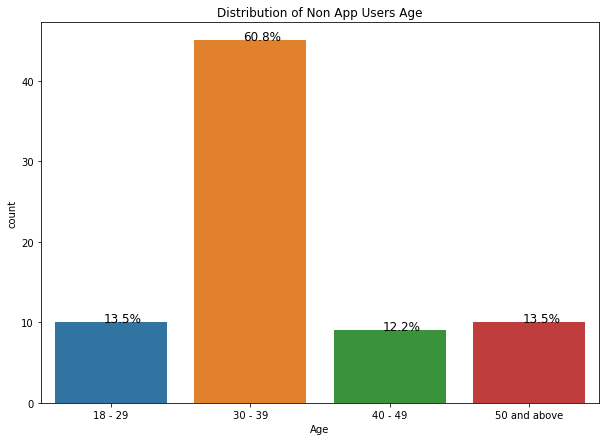

30 - 39         45
50 and above    10
18 - 29         10
40 - 49          9
Name: Age, dtype: int64

In [26]:
plt.figure(figsize=(10,7))  # setting the figure size
plt.title('Distribution of Non App Users Age')
ax = sns.countplot(x='Age', data=dataAppNonUser) # Plot histogram
perc_on_bar(ax,dataAppNonUser["Age"])
dataAppNonUser['Age'].value_counts(dropna=False)

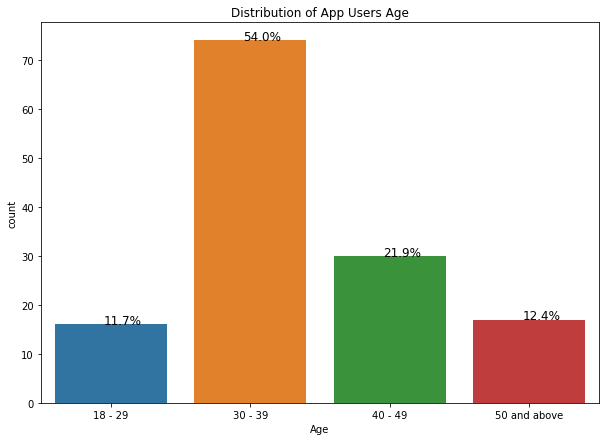

30 - 39         74
40 - 49         30
50 and above    17
18 - 29         16
Name: Age, dtype: int64

In [27]:
plt.figure(figsize=(10,7))  # setting the figure size
plt.title('Distribution of App Users Age')
ax = sns.countplot(x='Age', data=dataAppUser) # Plot histogram
perc_on_bar(ax,dataAppUser["Age"])
dataAppUser['Age'].value_counts(dropna=False)

### Observations on NUHS Visitor

In [28]:
dataNUHSVisitor = data.loc[data["NUHS Visitor"] == "Yes"]

In [29]:
print(f"There are {dataNUHSVisitor.shape[0]} rows and {dataNUHSVisitor.shape[1]} columns.")  # f-string

There are 96 rows and 10 columns.


In [30]:
dataNUHSVisitor.head()

,Age,NUHS Visitor,App User,App Used,Awareness Ch,Features Used,Satisfaction,Desirable Features,App nonuser reasons,Convert Reason
1,30 - 39,Yes,Yes,"HealthHub, Health Buddy","Social media (E.g. Facebook, Instagram)","Manage appointments (E.g. Booking, cancelling,...",Yes,Crowd gauge and estimated waiting time,NaN,NaN
4,30 - 39,Yes,Yes,HealthHub,Saw an ad on TV screen while waiting to see do...,Manage personal health data (E.g. Check past r...,Yes,Nil,NaN,NaN
5,30 - 39,Yes,Yes,Can't remember which one I use on my old phone,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
7,30 - 39,Yes,Yes,HealthHub,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,None,NaN,NaN
9,30 - 39,Yes,No,NaN,NaN,NaN,NaN,NaN,Not clear about the features of health service...,Convenience (Access health information & servi...


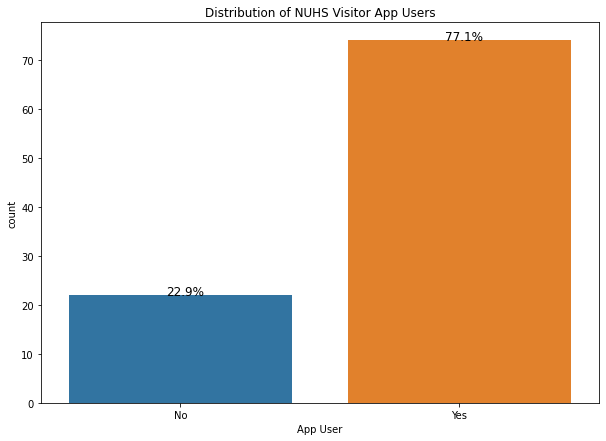

Yes    74
No     22
Name: App User, dtype: int64

In [47]:
plt.figure(figsize=(10,7))  # setting the figure size
plt.title('Distribution of NUHS Visitor App Users')
ax = sns.countplot(x='App User', data=dataNUHSVisitor) # Plot histogram
perc_on_bar(ax,dataNUHSVisitor["App User"])
dataNUHSVisitor['App User'].value_counts(dropna=False)

***Insights***
- 77.1% of NUHS visitors are App users.

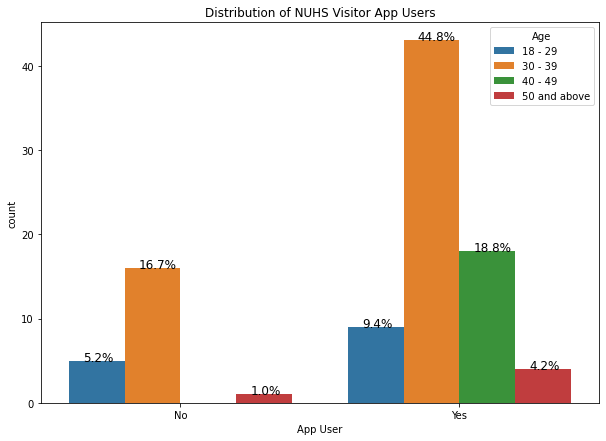

Yes    74
No     22
Name: App User, dtype: int64

In [48]:
plt.figure(figsize=(10,7))  # setting the figure size
plt.title('Distribution of NUHS Visitor App Users')
ax = sns.countplot(x='App User', data=dataNUHSVisitor, hue = 'Age') # Plot histogram
perc_on_bar(ax,dataNUHSVisitor["App User"])
dataNUHSVisitor['App User'].value_counts(dropna=False)

In [32]:
dataNUHSAppUSer = dataNUHSVisitor.loc[data["App User"] == "Yes"]

In [33]:
dataNUHSAppUSer.head()

,Age,NUHS Visitor,App User,App Used,Awareness Ch,Features Used,Satisfaction,Desirable Features,App nonuser reasons,Convert Reason
1,30 - 39,Yes,Yes,"HealthHub, Health Buddy","Social media (E.g. Facebook, Instagram)","Manage appointments (E.g. Booking, cancelling,...",Yes,Crowd gauge and estimated waiting time,NaN,NaN
4,30 - 39,Yes,Yes,HealthHub,Saw an ad on TV screen while waiting to see do...,Manage personal health data (E.g. Check past r...,Yes,Nil,NaN,NaN
5,30 - 39,Yes,Yes,Can't remember which one I use on my old phone,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
7,30 - 39,Yes,Yes,HealthHub,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,None,NaN,NaN
10,18 - 29,Yes,Yes,HealthHub,Saw an ad on TV screen while waiting to see do...,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN


HealthHub                                         45
HealthHub, Health Buddy                           13
Health Buddy                                       7
OneNUHS                                            3
HealthHub, OneNUHS                                 3
HealthHub, OneNUHS, Health Buddy, Healthy 365      1
HealthHub, OneNUHS, Health Buddy                   1
Can't remember which one I use on my old phone     1
Samsung Health                                     0
Healthifyme                                        0
Fwmom care                                         0
Name: App Used, dtype: int64

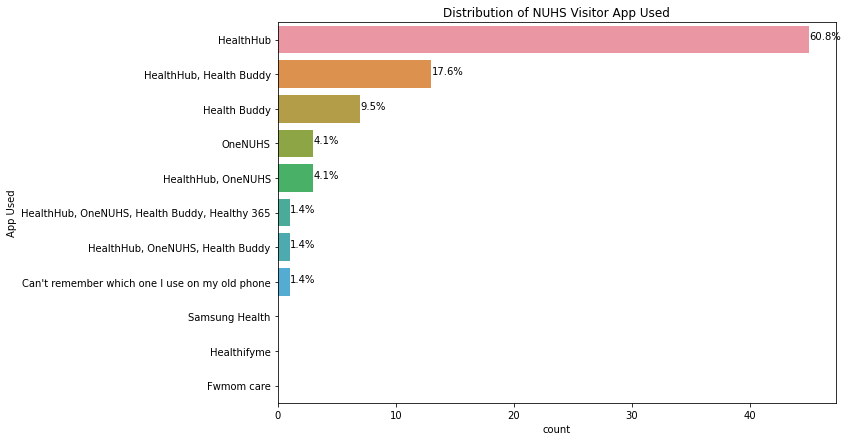

In [34]:
plt.figure(figsize=(10,7))  # setting the figure size
plt.title('Distribution of NUHS Visitor App Used')
ax = sns.countplot(y='App Used', data=dataNUHSAppUSer, order = dataNUHSAppUSer["App Used"].value_counts().index) # Plot histogram
# perc_on_bar(ax,dataNUHSAppUSer["App Used"])

total = len(dataNUHSAppUSer['App Used'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
dataNUHSAppUSer['App Used'].value_counts(dropna=False)

***Insights***
- 60.8% of NUHS visitor App users use only HealthHub, followed by HealthHub/Health Buddy users (17.6%) and only Health Buddy (9.5%) users.

### How App Users know of and think of their Apps

#### HealthHub

In [35]:
print(f"There are {dataHealthHub.shape[0]} rows and {dataHealthHub.shape[1]} columns.")  # f-string

There are 79 rows and 10 columns.


In [36]:
dataHealthHub.head()

,Age,NUHS Visitor,App User,App Used,Awareness Ch,Features Used,Satisfaction,Desirable Features,App nonuser reasons,Convert Reason
0,30 - 39,No,Yes,HealthHub,via hospital,"Manage appointments (E.g. Booking, cancelling,...",Yes,notification on appointments and health screen...,NaN,NaN
4,30 - 39,Yes,Yes,HealthHub,Saw an ad on TV screen while waiting to see do...,Manage personal health data (E.g. Check past r...,Yes,Nil,NaN,NaN
6,30 - 39,No,Yes,HealthHub,"Recommendation from friend/family, Social medi...",Get the latest health tips,Yes,Maybe See a doctor online?,NaN,NaN
7,30 - 39,Yes,Yes,HealthHub,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,None,NaN,NaN
10,18 - 29,Yes,Yes,HealthHub,Saw an ad on TV screen while waiting to see do...,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN


In [37]:
dataHealthHub.tail()

,Age,NUHS Visitor,App User,App Used,Awareness Ch,Features Used,Satisfaction,Desirable Features,App nonuser reasons,Convert Reason
187,50 and above,No,Yes,HealthHub,From polyclinic staff,"Manage appointments (E.g. Booking, cancelling,...",Yes,Can’t think of any. So far so good,NaN,NaN
190,40 - 49,Yes,Yes,HealthHub,"Social media (E.g. Facebook, Instagram)",Manage my dependent's medical appointments,No,simplified functions able to change appointmen...,NaN,NaN
191,40 - 49,Yes,Yes,HealthHub,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,NIl,NaN,NaN
192,18 - 29,No,Yes,HealthHub,Adverts in hospitals,"Manage appointments (E.g. Booking, cancelling,...",Yes,Better User experience,NaN,NaN
201,40 - 49,Yes,Yes,HealthHub,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,Pharmacy?,NaN,NaN


Recommendation from friend/family                                                                        26
Google search                                                                                            11
Social media (E.g. Facebook, Instagram)                                                                   6
Read or heard on the news                                                                                 5
Saw an ad on TV screen while waiting to see doctor                                                        4
Recommendation from friend/family, Social media (E.g. Facebook, Instagram)                                3
From polyclinic staff                                                                                     2
Medical clinic                                                                                            2
Roadshows                                                                                                 2
Social media (E.g. Facebook,

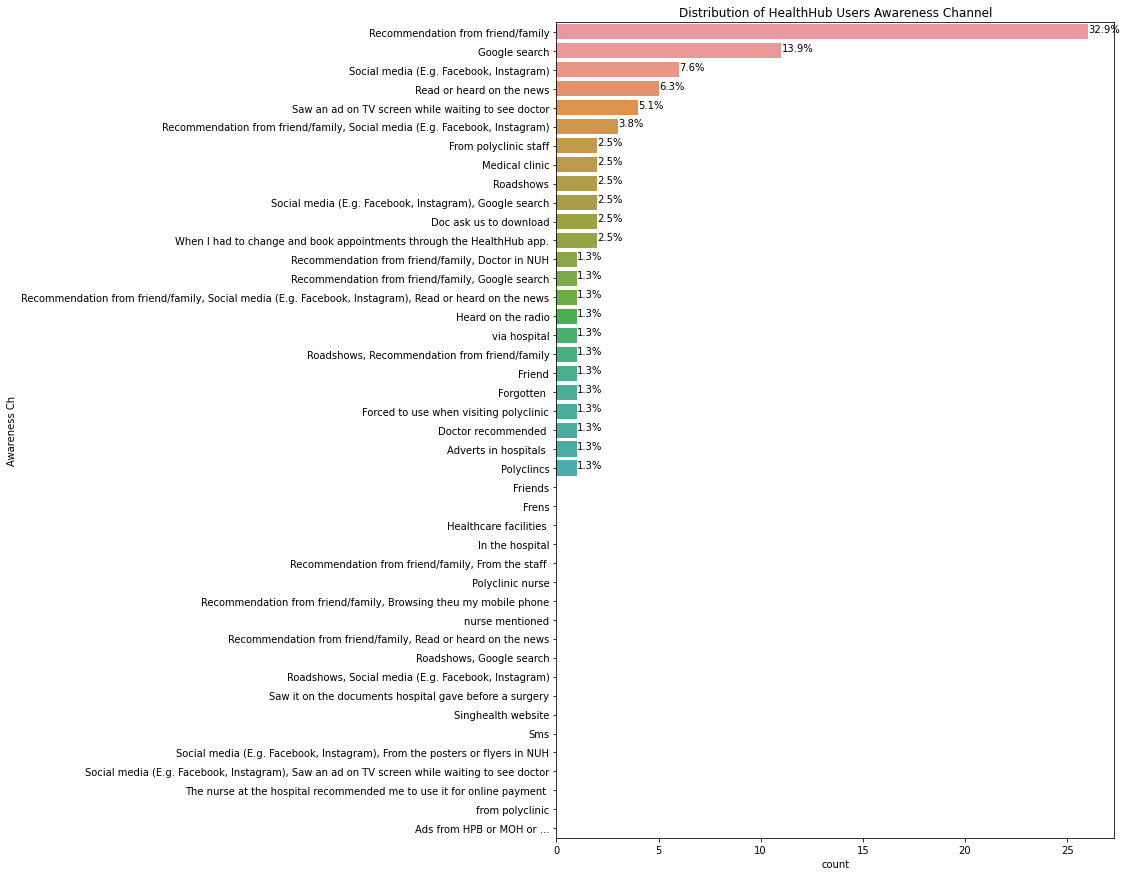

In [38]:
plt.figure(figsize=(10,15))  # setting the figure size
plt.title('Distribution of HealthHub Users Awareness Channel')
ax = sns.countplot(y='Awareness Ch', data=dataHealthHub, order = dataHealthHub["Awareness Ch"].value_counts().index) # Plot histogram
# perc_on_bar(ax,dataNUHSAppUSer["App Used"])

total = len(dataHealthHub['Awareness Ch'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
dataHealthHub['Awareness Ch'].value_counts(dropna=False)

***Insights***
- Top 3 channels HealthHub users are aware of Health Hub:
  - 1: Recommendation from friend/family (32.9%)
  - 2: Google Search (13.9%)
  - 3: Social Media (7.6%)

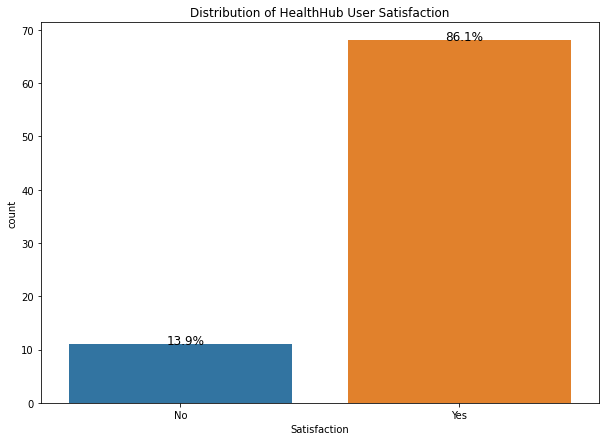

Yes    68
No     11
Name: Satisfaction, dtype: int64

In [39]:
plt.figure(figsize=(10,7))  # setting the figure size
plt.title('Distribution of HealthHub User Satisfaction')
ax = sns.countplot(x='Satisfaction', data=dataHealthHub) # Plot histogram
perc_on_bar(ax,dataHealthHub["Satisfaction"])
dataHealthHub['Satisfaction'].value_counts(dropna=False)

***Insights***
- 86.1% of HealthHub users are satisfied.

#### HealthBuddy

In [40]:
print(f"There are {dataHealthBuddy.shape[0]} rows and {dataHealthBuddy.shape[1]} columns.")  # f-string

There are 20 rows and 10 columns.


In [41]:
dataHealthBuddy.head(10)

,Age,NUHS Visitor,App User,App Used,Awareness Ch,Features Used,Satisfaction,Desirable Features,App nonuser reasons,Convert Reason
12,30 - 39,No,Yes,Health Buddy,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
21,18 - 29,No,Yes,Health Buddy,Sms,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
22,30 - 39,No,Yes,Health Buddy,Saw it on the documents hospital gave before a...,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
29,40 - 49,Yes,Yes,Health Buddy,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,Merging of health appointments with Google cal...,NaN,NaN
34,30 - 39,Yes,Yes,Health Buddy,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,Nil,NaN,NaN
56,50 and above,No,Yes,Health Buddy,Recommendation from friend/family,App is installed but hardly use,No,No benefits /incentives to use app,NaN,NaN
61,50 and above,Yes,Yes,Health Buddy,Read or heard on the news,"Manage appointments (E.g. Booking, cancelling,...",Yes,nil,NaN,NaN
106,40 - 49,Yes,Yes,Health Buddy,Saw an ad on TV screen while waiting to see do...,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
124,30 - 39,No,Yes,Health Buddy,Saw an ad on TV screen while waiting to see do...,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
138,30 - 39,Yes,Yes,Health Buddy,Singhealth website,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN


In [42]:
dataHealthBuddy.tail(10)

,Age,NUHS Visitor,App User,App Used,Awareness Ch,Features Used,Satisfaction,Desirable Features,App nonuser reasons,Convert Reason
150,30 - 39,Yes,Yes,Health Buddy,The nurse at the hospital recommended me to us...,"Manage appointments (E.g. Booking, cancelling,...",No,NaN,NaN,NaN
151,30 - 39,No,Yes,Health Buddy,nurse mentioned,"Manage appointments (E.g. Booking, cancelling,...",No,NaN,NaN,NaN
168,30 - 39,Yes,Yes,Health Buddy,Recommendation from friend/family,Downloaded the app but haven't really used it,Yes,NaN,NaN,NaN
174,50 and above,No,Yes,Health Buddy,Ads from HPB or MOH or ...,"Manage appointments (E.g. Booking, cancelling,...",Yes,Lab test results again. They used to be there...,NaN,NaN
193,30 - 39,No,Yes,Health Buddy,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",No,Appointment changes,NaN,NaN
195,40 - 49,No,Yes,Health Buddy,from polyclinic,"Manage appointments (E.g. Booking, cancelling,...",Yes,na,NaN,NaN
196,40 - 49,No,Yes,Health Buddy,Frens,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
197,40 - 49,No,Yes,Health Buddy,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",Yes,Nil,NaN,NaN
199,40 - 49,No,Yes,Health Buddy,Frens,"Manage appointments (E.g. Booking, cancelling,...",Yes,NaN,NaN,NaN
207,30 - 39,No,Yes,Health Buddy,nurse mentioned,"Manage appointments (E.g. Booking, cancelling,...",No,NaN,NaN,NaN


Recommendation from friend/family                                                                        6
Frens                                                                                                    2
nurse mentioned                                                                                          2
Saw an ad on TV screen while waiting to see doctor                                                       2
Sms                                                                                                      1
Google search                                                                                            1
Saw it on the documents hospital gave before a surgery                                                   1
Singhealth website                                                                                       1
Ads from HPB or MOH or ...                                                                               1
The nurse at the hospital recommended

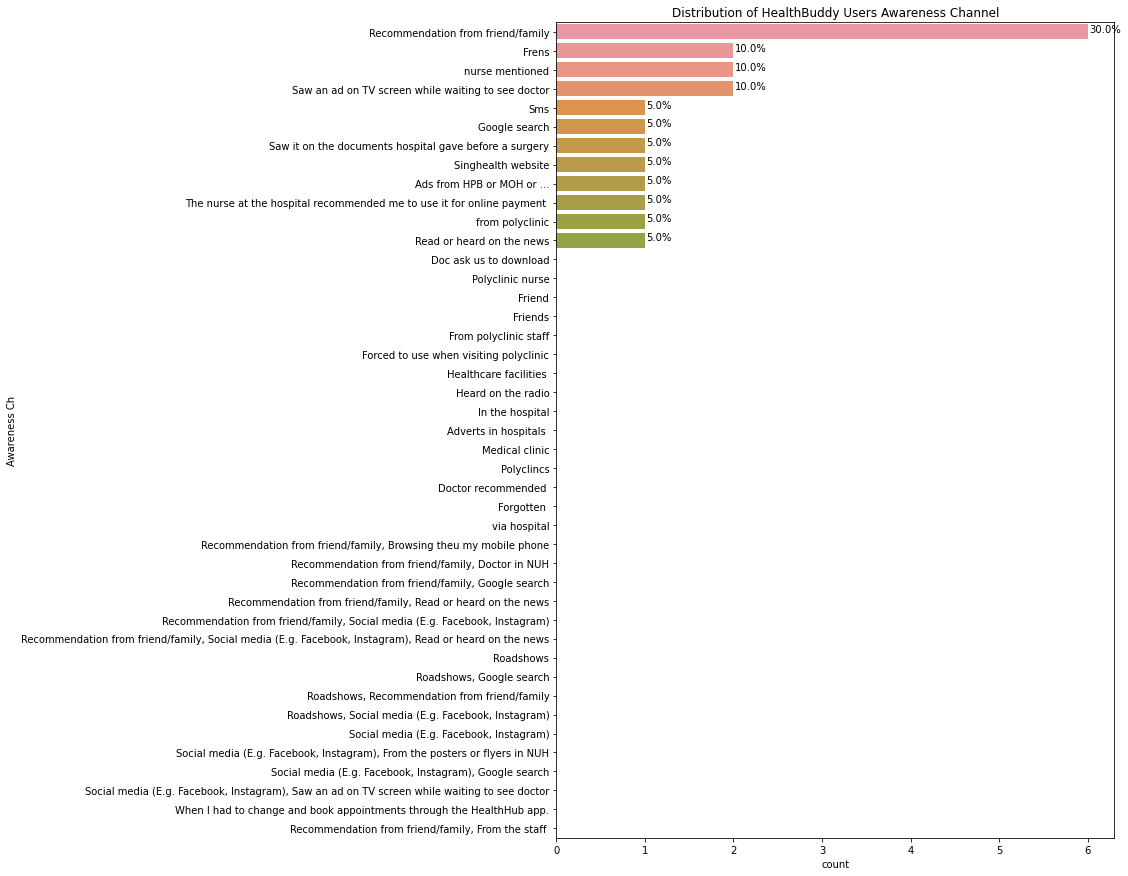

In [43]:
plt.figure(figsize=(10,15))  # setting the figure size
plt.title('Distribution of HealthBuddy Users Awareness Channel')
ax = sns.countplot(y='Awareness Ch', data=dataHealthBuddy, order = dataHealthBuddy["Awareness Ch"].value_counts().index) # Plot histogram
# perc_on_bar(ax,dataNUHSAppUSer["App Used"])

total = len(dataHealthBuddy['Awareness Ch'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
dataHealthBuddy['Awareness Ch'].value_counts(dropna=False)

***Insights***
- Top 3 channels HealthBuddy users are aware of HealthBuddy:
  - 1: Recommendation from friend/family (40.0%)
  - 2: Healthcare institutions touchpoints (35.0%)
  - 3: Remaining channels (25.0%)

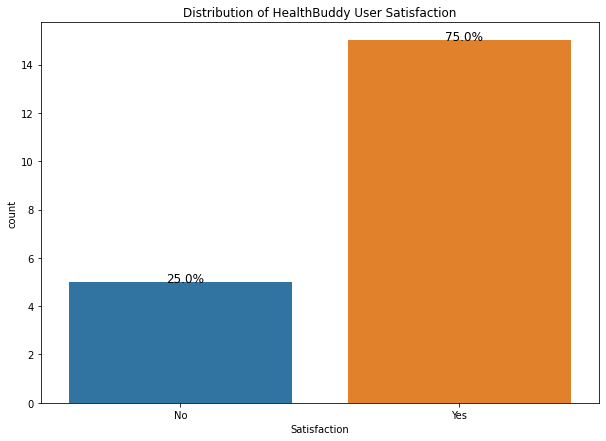

Yes    15
No      5
Name: Satisfaction, dtype: int64

In [44]:
plt.figure(figsize=(10,7))  # setting the figure size
plt.title('Distribution of HealthBuddy User Satisfaction')
ax = sns.countplot(x='Satisfaction', data=dataHealthBuddy) # Plot histogram
perc_on_bar(ax,dataHealthBuddy["Satisfaction"])
dataHealthBuddy['Satisfaction'].value_counts(dropna=False)

***Insights***
- 75.0% of HealthBuddy users are satisfied.

#### OneNUHS Awareness

In [45]:
print(f"There are {dataNUHS.shape[0]} rows and {dataNUHS.shape[1]} columns.")  # f-string

There are 3 rows and 10 columns.


In [46]:
dataNUHS.head()

,Age,NUHS Visitor,App User,App Used,Awareness Ch,Features Used,Satisfaction,Desirable Features,App nonuser reasons,Convert Reason
104,30 - 39,Yes,Yes,OneNUHS,Recommendation from friend/family,"Manage appointments (E.g. Booking, cancelling,...",No,The ability to perform payments at other NUHS ...,NaN,NaN
128,30 - 39,Yes,Yes,OneNUHS,Google search,"Manage appointments (E.g. Booking, cancelling,...",Yes,Obtain automated medical certificate when requ...,NaN,NaN
157,30 - 39,Yes,Yes,OneNUHS,In the hospital,"Manage appointments (E.g. Booking, cancelling,...",Yes,None,NaN,NaN


***Insights***
- Due to recent launch of OneNUHS App and too little data, it is inconclusive to say which awareness campaign is more effective. (Only 3 samples)
- It is also inconclusive to say what is the satisfaction level of the OneNUHS App.

## Conclusion

### Insights

- 77.1% of NUHS visitors are App users.
- 60.8% of NUHS visitor App users use only HealthHub, followed by HealthHub/Health Buddy users (17.6%) and only Health Buddy (9.5%) users.
- Top 3 channels HealthHub users are aware of Health Hub:
  - 1: Recommendation from friend/family (32.9%)
  - 2: Google Search (13.9%)
  - 3: Social Media (7.6%)
- 86.1% of HealthHub users are satisfied.
- Top 3 channels HealthBuddy users are aware of HealthBuddy:
  - 1: Recommendation from friend/family (40.0%)
  - 2: Healthcare institutions touchpoints (35.0%)
  - 3: Remaining channels (25.0%)
- 75.0% of HealthBuddy users are satisfied.
- Due to recent launch of OneNUHS App and too little data, it is inconclusive to say which awareness campaign is more effective. (Only 3 samples)
- It is also inconclusive to say what is the satisfaction level of the OneNUHS App.